In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

In [2]:
train_dir = "E://PDuCV//chest_xray//train"
test_dir = "E://PDuCV//chest_xray//test"
val_dir = "E://PDuCV//chest_xray//val"

In [3]:
data_gen = ImageDataGenerator(rescale = 1./255,
                             shear_range = 0.2, 
                             zoom_range = 0.15,
                             rotation_range = 7,
                             width_shift_range=0.15,  
                             height_shift_range=0.1,  
                             horizontal_flip=True)

train_gen = data_gen.flow_from_directory(train_dir,
                                           target_size = (300, 300),
                                           batch_size = 32,
                                           shuffle = True,
                                           color_mode = 'grayscale',
                                            class_mode = 'binary')

val_test_gen = ImageDataGenerator(rescale = 1./255)

val_gen = val_test_gen.flow_from_directory(val_dir,
                                      target_size = (300, 300),
                                      batch_size = 32,
                                      shuffle = False,
                                      color_mode = 'grayscale',
                                      class_mode = 'binary')

test_gen = val_test_gen.flow_from_directory(test_dir,
                                      target_size = (300, 300),
                                      batch_size = 32,
                                      shuffle = False,
                                      color_mode = 'grayscale',
                                      class_mode = 'binary')

Found 4016 images belonging to 2 classes.
Found 1016 images belonging to 2 classes.
Found 824 images belonging to 2 classes.


In [4]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(300,300,1)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.00005),
                  metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 300, 300, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        1

In [6]:
stop = EarlyStopping(patience = 5, monitor = 'val_loss')

In [7]:
model.fit(x = train_gen, validation_data = val_gen, epochs = 100, shuffle = False, callbacks=[stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 126 steps, validate for 32 steps
Epoch 1/100
126/126 [==============================] - 71s 562ms/step - loss: 0.6102 - accuracy: 0.7154 - val_loss: 0.5007 - val_accuracy: 0.7953
Epoch 2/100
126/126 [==============================] - 76s 604ms/step - loss: 0.5550 - accuracy: 0.7161 - val_loss: 0.4957 - val_accuracy: 0.7953
Epoch 3/100
126/126 [==============================] - 87s 690ms/step - loss: 0.3880 - accuracy: 0.8272 - val_loss: 0.2986 - val_accuracy: 0.8720
Epoch 4/100
126/126 [==============================] - 92s 729ms/step - loss: 0.3092 - accuracy: 0.8738 - val_loss: 0.3332 - val_accuracy: 0.8268
Epoch 5/100
126/126 [==============================] - 92s 733ms/step - loss: 0.2944 - accuracy: 0.8837 - val_loss: 0.2602 - val_accuracy: 0.8799
Epoch 6/100
126/126 [==============================] - 95s 753ms/step - loss: 0.2770 - accuracy: 0.8862 - val_loss: 0.2780 - val_accuracy: 0.8681
Epoch 7/100
126/126 [==========

In [8]:
history = pd.DataFrame(model.history.history)

<AxesSubplot:>

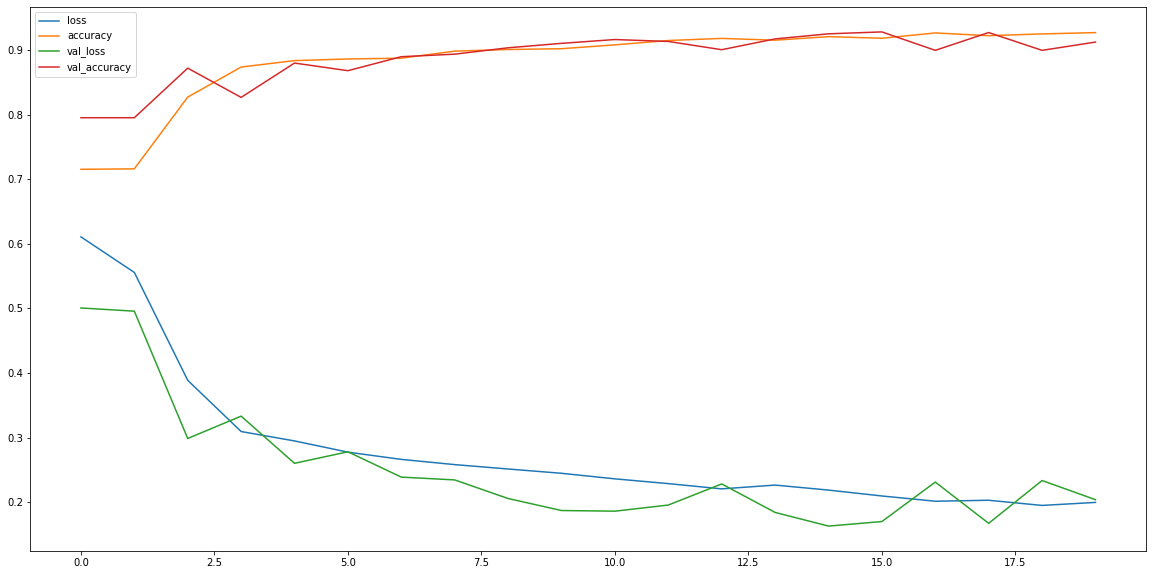

In [9]:
plt.rcParams["figure.figsize"] = (20,10)
history.plot()

In [10]:
print("Testing accuracy : ",model.evaluate(test_gen)[1]*100)

  ...
    to  
  ['...']
26/26 [==============================] - 11s 419ms/step - loss: 0.2919 - accuracy: 0.8750
Testing accuracy :  87.5


In [11]:
predictions_test = (model.predict(test_gen,verbose=True) > 0.5).astype("int32")

26/26 [==============================] - 8s 314ms/step


Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       234
           1       0.92      0.91      0.91       590

    accuracy                           0.88       824
   macro avg       0.84      0.85      0.85       824
weighted avg       0.88      0.88      0.88       824



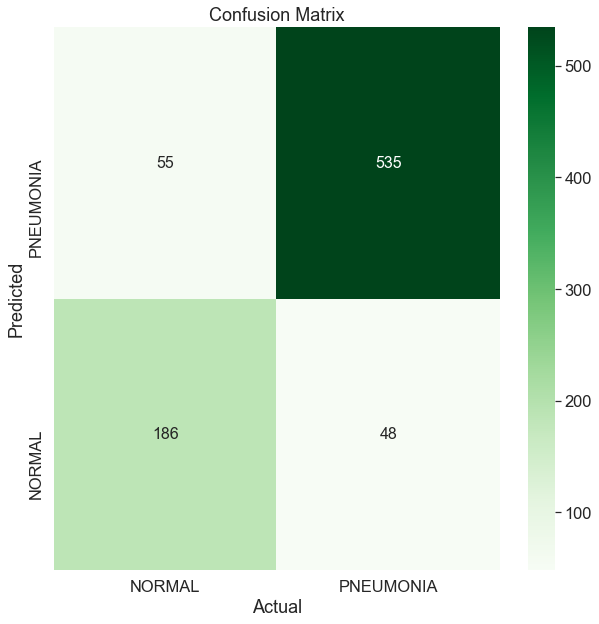

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
y_true = np.array([0] * 234 + [1] * 590) #234 Normal, #590 Pneumonia
data = confusion_matrix(y_true, predictions_test)
df_cm = pd.DataFrame(data, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Predicted'
df_cm.columns.name = 'Actual'
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5)
ax = sns.heatmap(df_cm,cmap = 'Greens', annot=True,fmt = '.5g',annot_kws={"size": 16})# font size
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['NORMAL', 'PNEUMONIA']); ax.yaxis.set_ticklabels(['NORMAL', 'PNEUMONIA']);
ax.set_ylim([0,2])

print("Classification Report: ")
print(classification_report(y_true,predictions_test))

In [14]:
model.save('third_model.h5')